In this notebook we intend of making a making an analysis of the popular Iris Dataset, and to classify the 3 different species that we have in the dataset which are the Iris Setosa, Iris Versicolor, Iris Virginica

# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import graphviz

# Loading the Dataset and Preparing it

In [ ]:
iris_data=pd.read_csv('/work/Iris.csv')

In [ ]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
species = iris_data[['Species']]
species.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
iris_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
#encoding the species column using the ordinal encoder to make it easier to handle numerically
ordinal_encoder = OrdinalEncoder()
iris_data['encoded_species'] = ordinal_encoder.fit_transform(species)

In [ ]:
ordinal_encoder.categories_ 

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]

In [ ]:
iris_setosa = iris_data.loc[iris_data.Species == 'Iris-setosa']
iris_versicolor = iris_data.loc[iris_data.Species == 'Iris-versicolor']
iris_virginica = iris_data.loc[iris_data.Species == 'Iris-virginica']

In [ ]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,encoded_species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.0


# Data Overview and Analysis

In [ ]:
iris_data.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,encoded_species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150,150.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,Iris-versicolor,NaN
freq,NaN,NaN,NaN,NaN,NaN,50,NaN
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN,2.000000


In [ ]:
iris_data.groupby(['Species']).mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,encoded_species
Species,,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244,0.0
Iris-versicolor,75.5,5.936,2.770,4.260,1.326,1.0
Iris-virginica,125.5,6.588,2.974,5.552,2.026,2.0


## Finding the aberrations

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SepalLengthCm'>

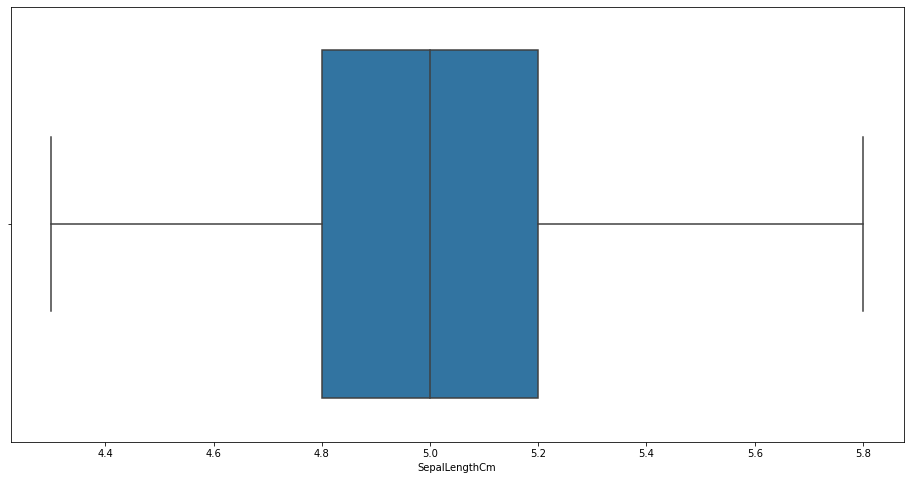

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(iris_setosa.SepalLengthCm)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SepalWidthCm'>

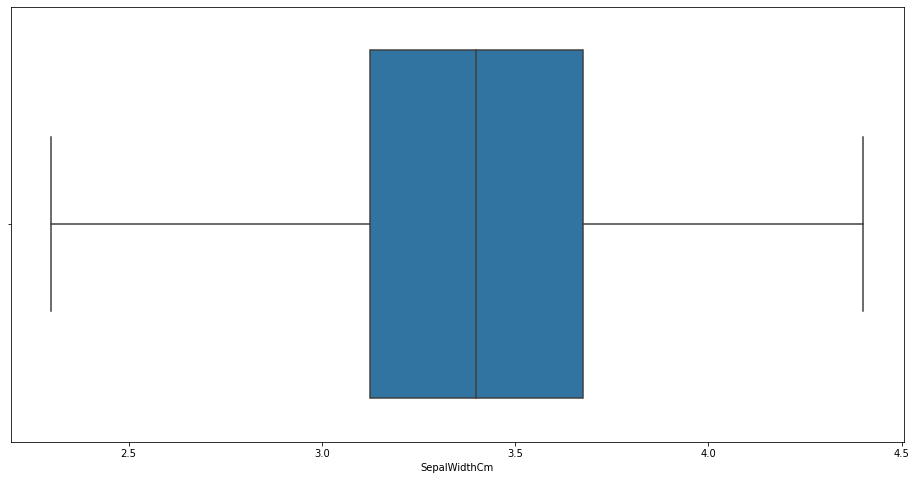

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(iris_setosa.SepalWidthCm)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PetalWidthCm'>

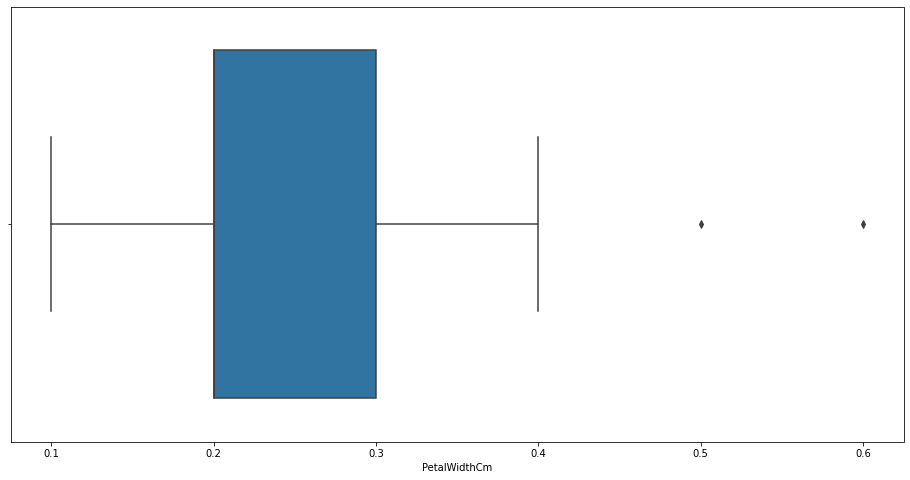

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(iris_setosa.PetalWidthCm)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PetalLengthCm'>

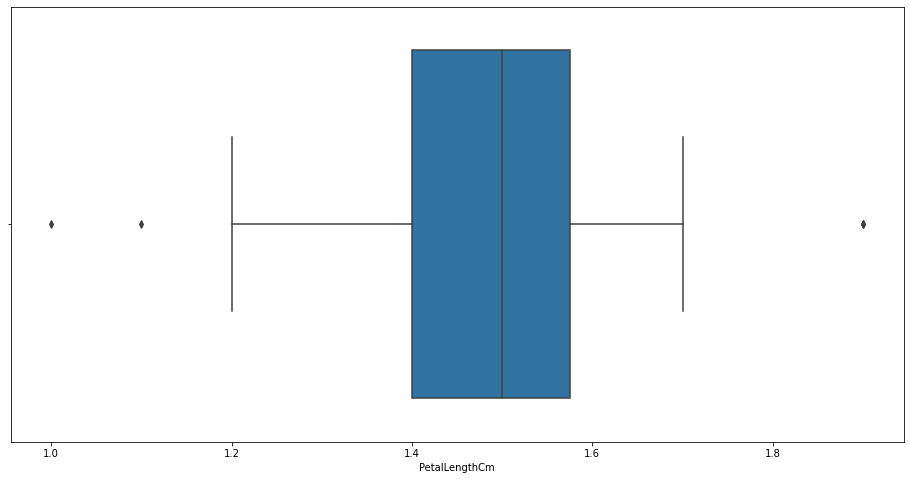

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(iris_setosa.PetalLengthCm)

## Visualizing the distributions of the different characteristics of the data

In [ ]:
import plotly.express as px
fig1 = px.scatter(iris_data, x='PetalLengthCm', y='SepalLengthCm', color='Species', marginal_x='box', marginal_y='box')
fig2 = px.scatter(iris_data, x='PetalWidthCm', y='SepalWidthCm', color='Species', marginal_x='box', marginal_y='box')
fig3 = px.scatter(iris_data, x='PetalWidthCm', y='PetalLengthCm', color='Species')

fig1.show()
fig2.show()
fig3.show()

## Visualizing the correlations

<AxesSubplot:>

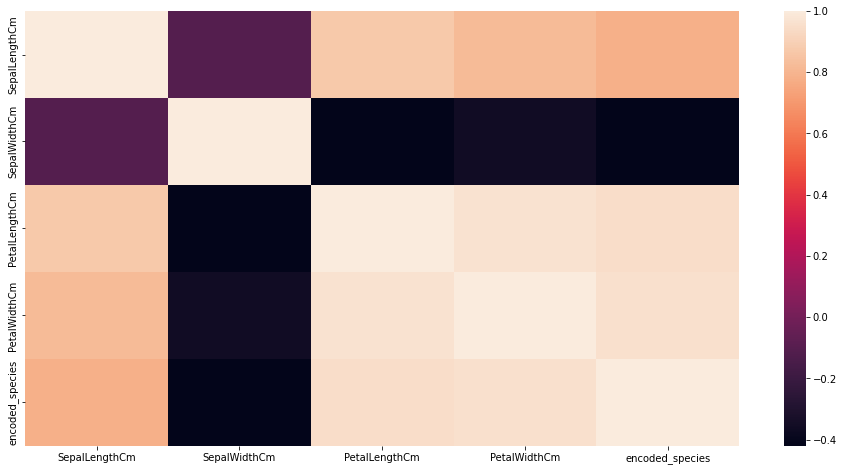

In [ ]:
iris_corr = iris_data.iloc[:, 1:].corr()
plt.figure(figsize=(16,8))
sns.heatmap(iris_corr)

In [ ]:
fig = px.imshow(iris_corr, title="Iris")
fig.show()

In [ ]:
setosa_corr = iris_setosa.iloc[:, 1:].corr()
versicolor_corr = iris_versicolor.iloc[:, 1:].corr()
virginica_corr = iris_virginica.iloc[:, 1:].corr()

In [ ]:
fig1 = px.imshow(setosa_corr, title='Iris Setosa')
fig2 = px.imshow(versicolor_corr, title='Iris Versicolor')
fig3 = px.imshow(virginica_corr, title='Iris Virginica')
fig1.show()
fig2.show()
fig3.show()

# Classification with Decision Trees

In [ ]:
X = iris_data.loc[:,('PetalLengthCm', 'PetalWidthCm')]
y = iris_data.encoded_species
feature_name = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names = np.array(['setosa', 'versicolor', 'virginica'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

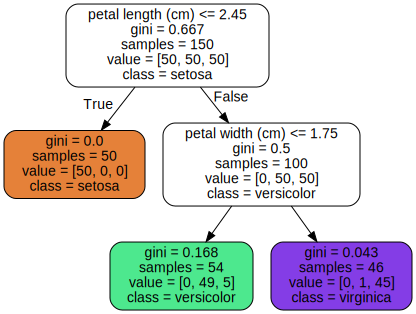

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

IMAGES_PATH = '/work/'

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=feature_name[2:],
        class_names=target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



Text(4.05, 0.5, '(Depth=2)')

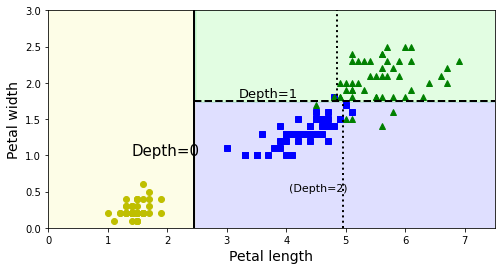

In [ ]:
from matplotlib.colors import ListedColormap

#Function from the Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X.iloc[:, 0][y==2], X.iloc[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3371188e-b904-4461-bb88-907c6cbe1c14' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>